In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor





In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [22]:
len(train)

8523

In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [25]:
train.Item_Identifier.nunique()

1559

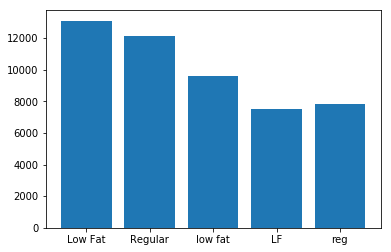

In [16]:
plt.bar(train['Item_Fat_Content'],train["Item_Outlet_Sales"])
plt.show()

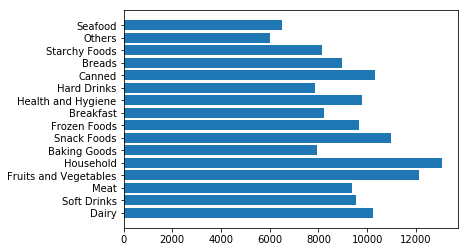

In [27]:
plt.barh(train['Item_Type'],train["Item_Outlet_Sales"])
plt.show()

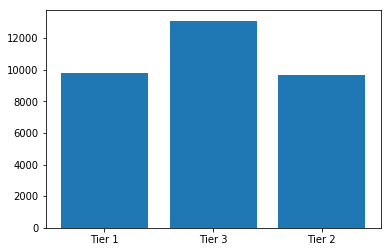

In [18]:
plt.bar(train['Outlet_Location_Type'],train["Item_Outlet_Sales"])
plt.show()

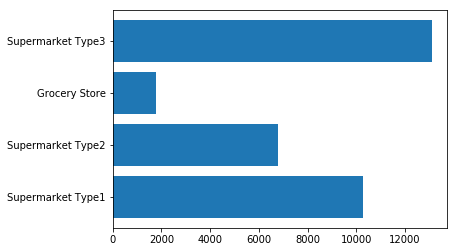

In [28]:
plt.barh(train['Outlet_Type'],train["Item_Outlet_Sales"])
plt.show()

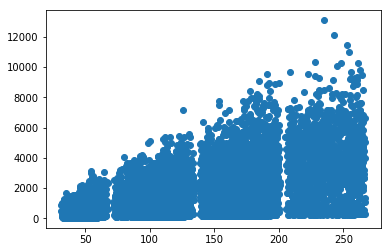

In [20]:
plt.scatter(train["Item_MRP"],train["Item_Outlet_Sales"])

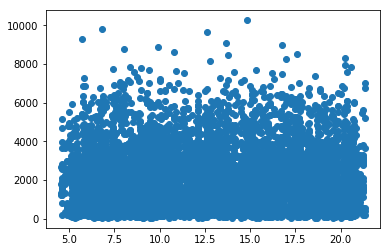

In [21]:
plt.scatter(train["Item_Weight"],train["Item_Outlet_Sales"])

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

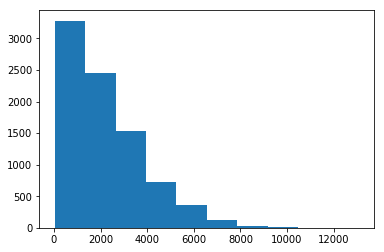

In [22]:
plt.hist(train["Item_Outlet_Sales"])

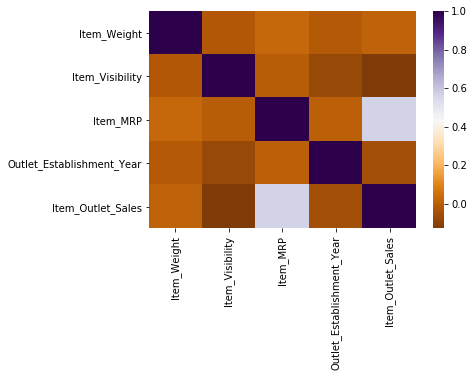

In [26]:
corr_matrix=train.corr()
sns.heatmap(corr_matrix, cmap='PuOr')


(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

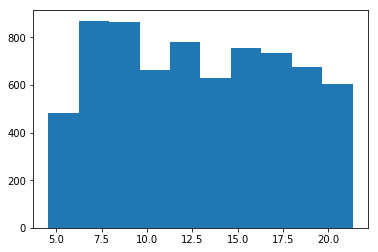

In [34]:
# Dealing with missing values in item_weight
item_weight = train.Item_Weight.dropna()
plt.hist(item_weight)

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

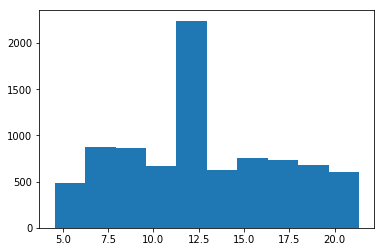

In [51]:
item_weight_mean = train.Item_Weight.fillna(np.mean(train.Item_Weight))
item_weight_median = train.Item_Weight.fillna(np.median(item_weight))
plt.hist(item_weight_median)


/Users/raihanahmed/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


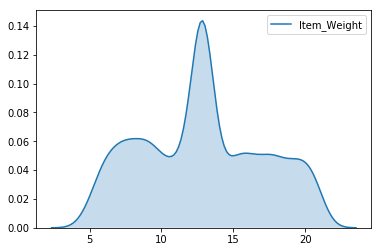

In [56]:
sns.kdeplot(item_weight_mean,shade=True)

(array([2403., 2730., 1495.,  931.,  561.,  265.,   57.,   35.,   29.,
          17.]),
 array([0.0035747 , 0.03605632, 0.06853795, 0.10101957, 0.1335012 ,
        0.16598282, 0.19846445, 0.23094607, 0.2634277 , 0.29590932,
        0.32839095]),
 <a list of 10 Patch objects>)

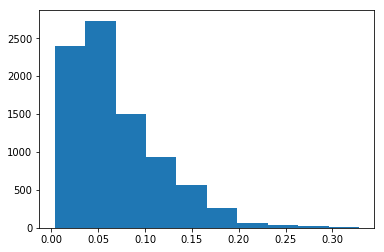

In [7]:
#plt.boxplot(train["Item_Visibility"])
train.Item_Visibility.describe()
Item_Visibility = [np.mean(train['Item_Visibility']) if x==0.00 else x for x in train['Item_Visibility']]
Item_Visibility
plt.hist(Item_Visibility)

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

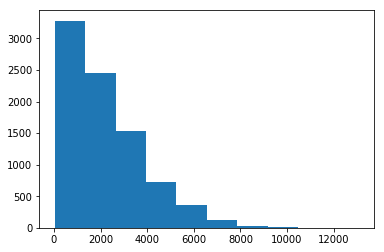

In [17]:
plt.hist(train["Item_Outlet_Sales"])

In [5]:
X = train.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"],axis=1)
X["Outlet_Size"]= X.Outlet_Size.fillna("Unknown")
#X.head()
X = pd.get_dummies(X,columns=['Item_Fat_Content','Item_Type','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'],
               drop_first=True)

y = train["Item_Outlet_Sales"]


In [6]:
X_mean = X
X_mean["Item_Weight"] = X_mean.Item_Weight.fillna(np.mean(X_mean["Item_Weight"]))
X_train, X_test, y_train, y_test = train_test_split(X_mean,y,test_size = 0.3,random_state = 123)


In [7]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

scaler_train.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

scaler_test.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

# X_mean_scaler = scaler.transform(X_mean)
# X_mean_scaler = pd.DataFrame(X_mean_scaler,index=X_mean.index,columns=X_mean.columns)


# Linear Regression

In [51]:
import statsmodels.api as sm
model_ols = sm.OLS(y_train,X_train_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     959.1
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:24:36   Log-Likelihood:                -50373.
No. Observations:                5966   AIC:                         1.008e+05
Df Residuals:                    5935   BIC:                         1.010e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                        -1.8782      3.477     -0.540      0.589      -8.694       4.937
Item_Visibility                  -404.4374    296.703     -1.363      0.173    -986.083     177.208
Item_MRP                           15.4235      0.236     65.343      0.000      14.961      15.886
Outlet_Establishment_Year          -0.9094      0.097     -9.375      0.000      -1.100      -0.719
Item_Fat_Content_Low Fat           10.7124     39.300      0.273      0.785     -66.330      87.755
Item_Fat_Content_Regular           37.3555     40.841      0.915      0.360     -42.707     117.418
Item_Fat_Content_low fat           34.2839     77.161      0.444      0.657    -116.980     185.547
Item_Fat_Content_reg              -46.4762     74.791     -0.621      0.534    -193.094     100.142
Item_Type_Breads                  -44.0321     98.067     -0.449      0.653    -236.280     148.216
Item_Type_Breakfast                11.7273    138.299      0.085      0.932    -259.389     282.844
Item_Type_Canned                   -6.2394     75.324     -0.083      0.934    -153.902     141.423
Item_Type_Dairy                   -50.1780     73.422     -0.683      0.494    -194.112      93.756
Item_Type_Frozen Foods            -82.1427     70.340     -1.168      0.243    -220.035      55.750
Item_Type_Fruits and Vegetables    10.2976     65.395      0.157      0.875    -117.901     138.496
Item_Type_Hard Drinks             -91.2303    110.242     -0.828      0.408    -307.344     124.883
Item_Type_Health and Hygiene      -52.3408     80.225     -0.652      0.514    -209.611     104.929
Item_Type_Household               -15.0636     71.361     -0.211      0.833    -154.957     124.830
Item_Type_Meat                    -24.8415     83.897     -0.296      0.767    -189.310     139.627
Item_Type_Others                  -33.9673    113.047     -0.300      0.764    -255.580     187.646
Item_Type_Seafood                 154.4193    190.365      0.811      0.417    -218.765     527.603
Item_Type_Snack Foods             -31.0142     65.867     -0.471      0.638    -160.137      98.108
Item_Type_Soft Drinks             -23.3876     83.599     -0.280      0.780    -187.272     140.496
Item_Type_Starchy Foods           -97.2165    126.314     -0.770      0.442    -344.838     150.405
Item_Fat_Content_Low Fat           10.7124     39.300      0.273      0.785     -66.330      87.755
Item_Fat_Content_Regular           37.3555     40.841      0.915      0.360     -42.707     117.418
Item_Fat_Content_low fat           34.2839     77.161      0.444      0.657    -116.980     185.547
Item_Fat_Content_reg              -46.4762     74.791     -0.621      0.534    -193.094     100.142
Outlet_Size_Medium                114.7624    118.309      0.970      0.332    -117

In [52]:
y_pred_ols = results.predict(X_test_scaled)

In [53]:

rmse_ols = np.sqrt(mean_squared_error(y_test,y_pred_lm))
rmse_ols

1137.88048597201

In [23]:

model_lm = LinearRegression()
model_lm.fit(X_train_scaled,y_train)
y_pred_lm = model_lm.predict(X_test_scaled)
rmse_lm = np.sqrt(mean_squared_error(y_test,y_pred_lm))
rmse_lm

1140.1824698334744

## Ridge Regression 

In [56]:


alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train_scaled, y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

y_pred_ridge = ridge_regressor.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print(rmse_ridge)


{'alpha': 10}
-1278964.9891265214
1140.4176555346191


## Lasso Regression

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [48]:
lassocv = LassoCV(cv=5, normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [49]:
y_pred_lassocv = lassocv.predict(X_test)
rmse_lassocv = np.sqrt(mean_squared_error(y_test,y_pred_lassocv))
rmse_lassocv

1139.5002136944713

In [37]:
r2_score(y_test,y_pred_lasso)

0.5682726792224002

In [34]:


lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train_scaled, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print(rmse_lasso)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

{'alpha': 10}
-1275109.892752032
1141.9556901945741


# Support Vector Regression

In [18]:

for k in ['linear','sigmoid']:
    svr = SVR(kernel=k)
    svr.fit(X_train, y_train)
    confidence = svr.score(X_test, y_test)
    print(k,confidence)


linear 0.42284521784886353
sigmoid -0.05288375098388931


In [20]:
y_pred_svr = SVR(kernel='linear')

svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test,y_pred_svr))
rmse_svr


1783.3422475147295

# Random Forest 

In [16]:

rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)



In [17]:
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmse_rf

1139.0561543673443

In [ ]:
# elastic net 